In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Dataset .csv')

In [169]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.shape

(9551, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
df['Cuisines'].nunique()

1825

In [8]:
df['Cuisines'].fillna(df['Cuisines'].value_counts().index[0], inplace=True)

## Level 1 Task 1: Top Cuisines
### Determine the top three most common cuisines in the dataset

In [14]:
top_cuisine=df['Cuisines'].value_counts().head(3)

In [16]:
top_cuisine.index, top_cuisine.values

(Index(['North Indian', 'North Indian, Chinese', 'Chinese'], dtype='object', name='Cuisines'),
 array([945, 511, 354]))

In [18]:
top_cuisine_df=pd.DataFrame({'Cuisine': top_cuisine.index, 'Counts': top_cuisine.values})

In [19]:
top_cuisine_df

,Cuisine,Counts
0,North Indian,945
1,"North Indian, Chinese",511
2,Chinese,354


### Calculate the percentage of restaurants that serve each of the top cuisines.

In [31]:
total_restaurants=df['Restaurant Name'].count()
total_restaurants

9551

In [33]:
top_cuisine_df['Counts']

0    945
1    511
2    354
Name: Counts, dtype: int64

In [37]:
len(df)

9551

In [38]:
top_cuisine_df['Counts']/total_restaurants

0    0.098943
1    0.053502
2    0.037064
Name: Counts, dtype: float64

In [35]:
top_cuisine_df['percentage']=(top_cuisine_df['Counts']/total_restaurants)*100

In [36]:
top_cuisine_df

,Cuisine,Counts,percentage
0,North Indian,945,9.894252
1,"North Indian, Chinese",511,5.350225
2,Chinese,354,3.706418


## Task 2: City Analysis

### Identify the city with the highest number of restaurants in the dataset

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [90]:
df['City'].nunique()

141

In [97]:
df['City'].value_counts().index[0]

'New Delhi'

In [48]:
df['City'].value_counts().idxmax()

'New Delhi'

### Calculate the average rating for restaurants in each city

In [55]:
df.groupby('City')

In [60]:
city_ratings=df.groupby('City')['Aggregate rating'].mean()

In [61]:
city_ratings.index

Index(['Abu Dhabi', 'Agra', 'Ahmedabad', 'Albany', 'Allahabad', 'Amritsar',
       'Ankara', 'Armidale', 'Athens', 'Auckland',
       ...
       'Vernonia', 'Victor Harbor', 'Vineland Station', 'Vizag', 'Waterloo',
       'Weirton', 'Wellington City', 'Winchester Bay', 'Yorkton', '��stanbul'],
      dtype='object', name='City', length=141)

In [62]:
city_ratings_df=pd.DataFrame({'City':city_ratings.index, 'Avg_Ratings':city_ratings.values})

In [75]:
city_ratings_df

,City,Avg_Ratings
0,Abu Dhabi,4.300000
1,Agra,3.965000
2,Ahmedabad,4.161905
3,Albany,3.555000
4,Allahabad,3.395000
...,...,...
136,Weirton,3.900000
137,Wellington City,4.250000
138,Winchester Bay,3.200000
139,Yorkton,3.300000


### Determine the city with the highest average rating.

In [74]:
city_ratings

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

In [85]:
city_ratings.sort_values(ascending= False).index[0]

'Inner City'

In [86]:
city_ratings.idxmax()

'Inner City'

In [84]:
city_ratings.sort_values(ascending=True).index[0]

'Faridabad'

In [98]:
city_ratings.idxmin()

'Faridabad'

## Task 3

### Task: Price Range Distribution Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
plt.figure(figsize=(15,8))
df['Price range'].value_counts().sort_index()

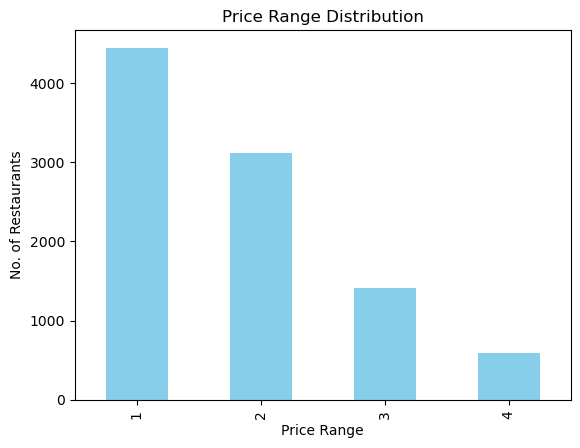

In [114]:
df['Price range'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('No. of Restaurants')
plt.show()

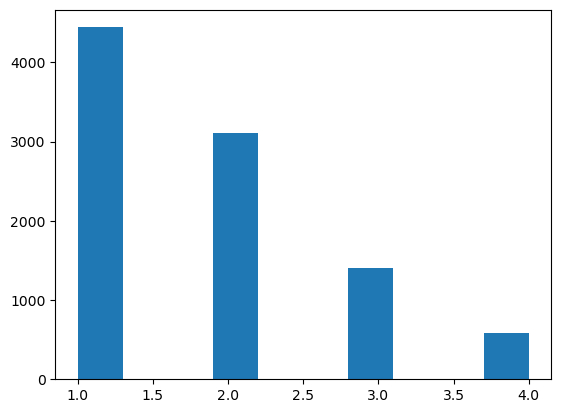

In [122]:
plt.hist(df['Price range'])
plt.show()

/Users/ginnyshai/anaconda3/envs/ml_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ginnyshai/anaconda3/envs/ml_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


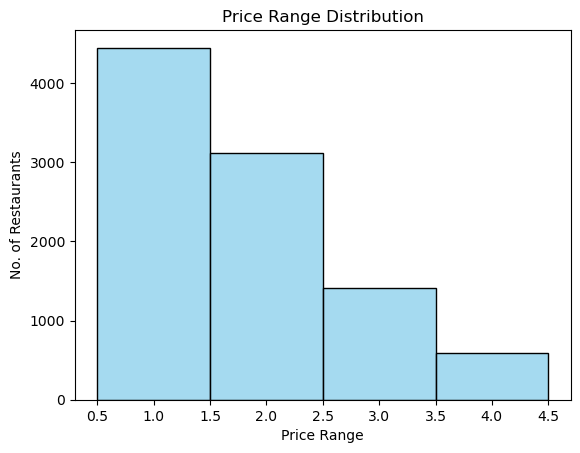

In [123]:
sns.histplot(df['Price range'], color='skyblue', edgecolor='black', discrete=True)
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('No. of Restaurants')
plt.show()

### Calculate the percentage of restaurants in each price range category.

In [131]:
data=df['Price range'].value_counts()

In [133]:
data_df=pd.DataFrame({'Price':data.index, 'Counts':data.values})

In [134]:
data_df

,Price,Counts
0,1,4444
1,2,3113
2,3,1408
3,4,586


In [129]:
total_price=df['Price range'].count()

In [135]:
data_df['percentage']=(data_df['Counts']/total_price)*100

In [139]:
data_df

,Price,Counts,percentage
0,1,4444,46.529159
1,2,3113,32.593446
2,3,1408,14.741912
3,4,586,6.135483


## Task 4

### Task: Online Delivery 
### Determine the percentage of restaurants that offer online delivery

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [149]:
df['Restaurant Name'].count()

9551

In [150]:
len(df['Restaurant Name'])

9551

In [154]:
df_online=df['Has Online delivery'].value_counts()

In [157]:
df_online_df=pd.DataFrame({'Has Online Delivery':df_online.index , 'Counts': df_online.values})

In [158]:
df_online_df

,Has Online Delivery,Counts
0,No,7100
1,Yes,2451


In [159]:
df_online_df['Percentage']= (df_online_df['Counts']/len(df['Restaurant Name']))*100

In [160]:
df_online_df

,Has Online Delivery,Counts,Percentage
0,No,7100,74.337766
1,Yes,2451,25.662234


### Compare the average ratings of restaurants with and without online delivery.

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [162]:
df['Aggregate rating']

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64

### average ratings of restaurants with online delivery.

In [177]:
df.loc[df['Has Online delivery']=='Yes', 'Aggregate rating'].mean()

3.2488372093023257

### average ratings of restaurants without online delivery.

In [175]:
df.loc[df['Has Online delivery']=='No', 'Aggregate rating'].mean()

2.465295774647887

## Level 2

## Task 1 : Restaurant Ratings

### Analyze the distribution of aggregate ratings and determine the most common rating range.

In [198]:
df_rating=df['Aggregate rating'].value_counts().sort_index()

In [201]:
df['Aggregate rating'].value_counts().sort_values(ascending=False)

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

In [197]:
df_rating

Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64

In [212]:
df_rating.idxmax()

0.0

### Calculate the average number of votes received by restaurants.

In [204]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [211]:
df['Votes'].mean()

156.909747670401

## Task 2 : Cuisine Combination 
### Identify the most common combinations of cuisines in the dataset.

In [229]:
top_cuisines=df['Cuisines'].value_counts()

In [230]:
top_cuisines_df=pd.DataFrame({'Cuisines':top_cuisines.index, 'Counts':top_cuisines.values})

In [311]:
top_cuisines_df.head(10)

,Cuisines,Counts
0,North Indian,945
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149


In [312]:
data['Cuisines'].str.split(",").explode().str.strip()

0                French
0              Japanese
0              Desserts
1              Japanese
2               Seafood
             ...       
9547               Cafe
9548            Italian
9548      World Cuisine
9549    Restaurant Cafe
9550               Cafe
Name: Cuisines, Length: 19719, dtype: object

In [285]:
data=pd.read_csv('Dataset .csv')
def common_combo(data):
    cuisines=data['Cuisines'].str.split(",").explode().str.strip()
    common_combo= cuisines.value_counts()
    
    return common_combo

most_common= common_combo(data)

print(f"Most common Cuisine combination includes \n{most_common_df.head(10)}")

Most common Cuisine combination is 
        Cuisine  Counts
0  North Indian    3960
1       Chinese    2735
2     Fast Food    1986
3       Mughlai     995
4       Italian     764
5        Bakery     745
6   Continental     736
7          Cafe     703
8      Desserts     653
9  South Indian     636


In [271]:
most_common_df=pd.DataFrame({'Cuisine':most_common.index, 'Counts':most_common.values})
most_common_df.head(10)

,Cuisine,Counts
0,North Indian,3960
1,Chinese,2735
2,Fast Food,1986
3,Mughlai,995
4,Italian,764
5,Bakery,745
6,Continental,736
7,Cafe,703
8,Desserts,653
9,South Indian,636


### Determine if certain cuisine combinations tend to have higher ratings.

In [237]:
top_cuisine_combo=df.groupby('Cuisines')['Aggregate rating'].mean()

In [243]:
top_cuisine_combo.nlargest(10)

Cuisines
American, BBQ, Sandwich         4.9
American, Burger, Grill         4.9
American, Caribbean, Seafood    4.9
American, Coffee and Tea        4.9
American, Sandwich, Tea         4.9
BBQ, Breakfast, Southern        4.9
Burger, Bar Food, Steak         4.9
Continental, Indian             4.9
European, Asian, Indian         4.9
European, Contemporary          4.9
Name: Aggregate rating, dtype: float64

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [331]:
cuisine_combo=df['Cuisines'].str.split(",").explode().str.strip()

In [333]:
cuisine_combo

0                French
0              Japanese
0              Desserts
1              Japanese
2               Seafood
             ...       
9547               Cafe
9548            Italian
9548      World Cuisine
9549    Restaurant Cafe
9550               Cafe
Name: Cuisines, Length: 19719, dtype: object

In [334]:
cuisine_combo.values

array(['French', 'Japanese', 'Desserts', ..., 'World Cuisine',
       'Restaurant Cafe', 'Cafe'], dtype=object)

In [336]:
rating_of_cuisine_combo=pd.DataFrame({'Cuisines':cuisine_combo, 'Rating': df['Aggregate rating']})

In [337]:
rating_of_cuisine_combo

,Cuisines,Rating
0,French,4.8
0,Japanese,4.8
0,Desserts,4.8
1,Japanese,4.5
2,Seafood,4.4
...,...,...
9547,Cafe,4.2
9548,Italian,3.7
9548,World Cuisine,3.7
9549,Restaurant Cafe,4.0


In [343]:
rating_of_cuisine_combo.groupby('Cuisines')['Rating'].mean().sort_values(ascending=False)

Cuisines
Sunda             4.900000
B�_rek            4.700000
Taiwanese         4.650000
Ramen             4.500000
Dim Sum           4.466667
                    ...   
Moroccan          1.620000
Awadhi            1.572727
Armenian          1.300000
Mineira           0.000000
Cuisine Varies    0.000000
Name: Rating, Length: 145, dtype: float64

## Task 3

### Task: Geographic Analysis
### Plot the locations of restaurants on a map using longitude and latitude coordinates.

In [342]:
import folium



In [347]:
data['Latitude'].iloc[0]

14.565443

In [357]:
map_restaurant=folium.Map(location=[data['Latitude'].iloc[0],data['Longitude'].iloc[0]],zoom_start=12)

for _, restaurant in data.iterrows():
    icon = folium.Icon(color='blue')
    folium.Marker(location=[restaurant['Latitude'], restaurant['Longitude']],
                  popup=f"{restaurant['Restaurant Name']}, Rating:{restaurant['Aggregate rating']}",
                  icon=icon).add_to(map_restaurant)

map_restaurant.save('restaurant_location_map.html')

### Identify any patterns or clusters of restaurants in specific areas

In [358]:
from sklearn.cluster import KMeans

In [363]:
X=data[['Latitude', 'Longitude']]
clusters=3

# applying k means clustering
kmeans= KMeans(n_clusters=clusters, random_state=42)
data['Cluster']=kmeans.fit_predict(X)

map_cluster=folium.Map(location=[data['Latitude'].iloc[0], data['Longitude'].iloc[0]], zoom_start=12)
for _, restaurant in data.iterrows():
    icon = folium.Icon(color='blue')
    cluster_color=f"cluster_{restaurant['Cluster']}"
    folium.Marker(location=[restaurant['Latitude'], restaurant['Longitude']],
                  popup=f"{restaurant['Restaurant Name']}, Rating:{restaurant['Aggregate rating']}",
                  icon=icon).add_to(map_restaurant)

map_restaurant.save('restaurant_cluster_map.html')

/Users/ginnyshai/anaconda3/envs/ml_project/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Task 4

## Task: Restaurant Chains
### Identify if there are any restaurant chains present in the dataset.

In [376]:
restaurant_counts=data['Restaurant Name'].value_counts()

In [381]:
restaurant_chains=restaurant_counts[restaurant_counts>1]

In [383]:
pd.DataFrame(restaurant_chains)

,count
Restaurant Name,
Cafe Coffee Day,83
Domino's Pizza,79
Subway,63
Green Chick Chop,51
McDonald's,48
...,...
Town Hall,2
Halki Aanch,2
Snack Junction,2


### Analyze the ratings and popularity of different restaurant chains.

In [385]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [394]:
restaurant_chain=df.groupby('Restaurant Name').agg({'Aggregate rating': 'mean', 'Votes': 'sum', 'Restaurant ID':'count'}).reset_index()

In [399]:
restaurant_chain.columns=['Restaurant Name', 'Average Rating', 'Total Votes', 'Number of Outlets']
restaurant_chain=restaurant_chain.sort_values(by='Average Rating', ascending=False)

In [400]:
restaurant_chain

,Restaurant Name,Average Rating,Total Votes,Number of Outlets
5322,Restaurant Mosaic @ The Orient,4.9,85,1
4177,Ministry of Crab,4.9,203,1
4135,Miann,4.9,281,1
5757,Shorts Burger and Shine,4.9,820,1
4165,Milse,4.9,754,1
...,...,...,...,...
1105,Cafe Corner,0.0,3,1
4905,Pheva Tandooris,0.0,0,1
4913,Pick & Carry,0.0,2,1
1096,Cafe Brownie,0.0,3,1
